In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Original size

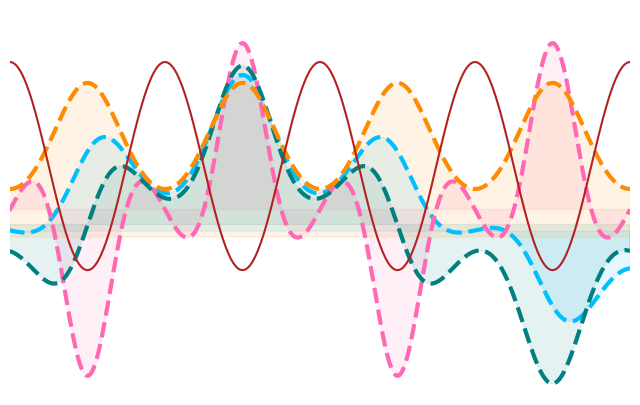

In [2]:
from matplotlib.figure import figaspect
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz
from HubbardTweezer.tools.fix_phase import fix_phase


nq = 501  # number of qx points
nx = 1001  # number of x points
lmax = 20
Ei = []
u = []
psi = np.zeros((nx, nq), dtype=complex)

k_light = 1  # wavevector of the light beam creating the lattice
wavelength = 2 * np.pi / k_light
a_lattice = wavelength / 2  # period of the lattice

l = np.arange(-lmax, lmax + 1)
V0 = 5  # V0/E_recoil
V0 *= k_light**2  # "true" V0
x = np.linspace(-a_lattice * 2.5, a_lattice * 2.5, nx)
dx = x[1] - x[0]
qx = np.linspace(-k_light, k_light, nq, endpoint=False)

for qi in range(nq):
    q = qx[qi]
    Hmat = np.diag([(q + 2 * k * k_light) ** 2 for k in l])
    Hmat -= (
        V0 / 4 * (np.diag(np.ones(len(l) - 1), 1) + np.diag(np.ones(len(l) - 1), -1))
    )
    evals, evecs = np.linalg.eigh(Hmat)
    Ei.append(evals)
    u.append(evecs[:, 0])
    psi[:, qi] = (
        evecs[:, 0]
        @ np.exp(1j * np.outer(2 * k_light * l, x))
        * np.exp(-1j * q * k_light * x)
    )
Ei = np.array(Ei)
u = np.array(u)


fig, ax = plt.subplots(figsize=(8, 5))
color = ["hotpink", "teal", "darkorange", "deepskyblue"]
qilist = [0, 125, 250, 333]
for i in range(-1, 3):
    qi = qilist[i]
    plt.plot(x, np.real(psi[:, qi]) + Ei[qi][0], lw=3, ls="--", color=color[i])
    plt.fill_between(x, Ei[qi][0], np.real(psi[:, qi]) + Ei[qi][0], color=color[i], alpha=0.1)
plt.plot(x, 2 * np.sin(k_light * x) ** 2 - 1, color="firebrick")

plt.axis("off")
plt.xlim(-1.5 * a_lattice, 2.5 * a_lattice)
plt.ylim(-2.2, 1.5)
plt.savefig("fig0a.svg", transparent=True, bbox_inches="tight")


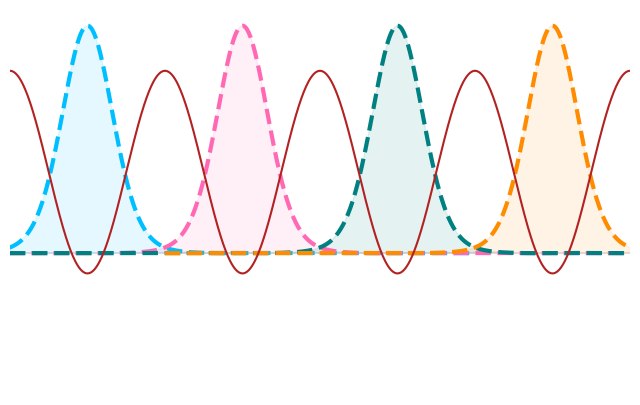

In [3]:
w = []

for xi in x:
    b = 0
    a = np.exp(1j * 2 * np.pi * l * xi / a_lattice)
    for p in range(nq):
        b += np.sum(a * u[p, :]) * np.exp(1j * qx[p] * xi)
    w.append(b / nq)
w = np.array(w)

fig, ax = plt.subplots(figsize=(8, 5))
color = ["hotpink", "teal", "darkorange", "deepskyblue"]
absw = 3 * abs(w) ** 2 / np.sum(abs(w) ** 2) / dx
for i in range(-1, 3):
    plt.plot(x + a_lattice * i, absw - 0.8, lw=3, ls="--", color=color[i])
    plt.fill_between(x + a_lattice * i, -0.8, absw - 0.8, color=color[i], alpha=0.1)
plt.plot(x, 2 * np.sin(k_light * x) ** 2 - 1, color="firebrick")

plt.axis("off")
plt.xlim(-1.5 * a_lattice, 2.5 * a_lattice)
plt.ylim(-2.2, 1.6)
plt.savefig("fig0b.svg", transparent=True, bbox_inches="tight")


### Figure 0c

In [8]:
from HubbardTweezer.Hubbard.equalizer import *
from HubbardTweezer.tools.fix_phase import fix_phase

import numpy as np
import numpy.linalg as la

N = 20
L = 4
b = 0
R0 = np.array([3, 3, 7.2])
dvr = HubbardEqualizer(
    N,
    R0=R0,
    lattice=np.array([L], dtype=int),
    trap=(100, 1000),
    lc=(1550,),
    dim=3,
    band=b + 1,
    equalize_V0=False,
    ghost=False,
    sparse=True,
    lattice_symmetry=True,
    symmetry=True,
    verbosity=3,
)

E, W, parity = dvr.eigen_basis()
E = E[b]
W = W[b]
p = parity[b]

A, U = singleband_WF(dvr, E, W, p)
print("detU =", la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p, p)
print(dvr.R0[0] * 1)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=100kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
lattice: lattice shape is square
lattice: Full lattice sizes: [4]
lattice: lattice constants: [1.55 1.55]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[35 20 20] is set.
DVR: R0=[5.325 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
H_op: n=[35 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 5 states are to be calculated.
H_op: n=[35 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.49s.
H_solver: eigenstates memory usage:  0.61 MiB.
H_op: n=[35 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussi

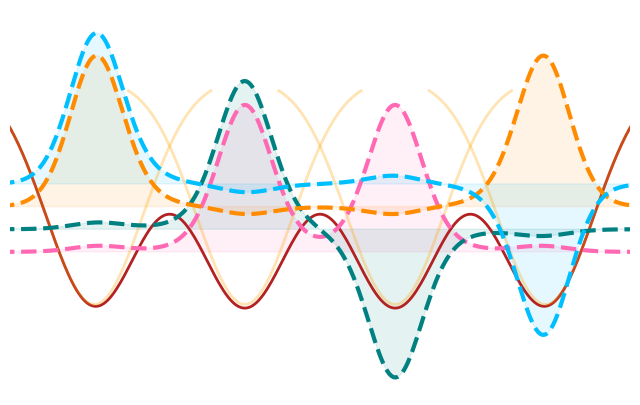

In [15]:
from matplotlib.figure import figaspect
import matplotlib.pyplot as plt
from HubbardTweezer.DVR.wavefunc import psi


fig, ax = plt.subplots(figsize=(8, 5))
edge = 0.6
wf_scale = 0.5
pwr = 1

y = np.array([0])
z = np.array([0])
taillen = 1.2

# Plot total potential
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
X = np.meshgrid(x, y, z, indexing="ij")
v = dvr.Vfun(*X) ** pwr
v = -abs(v[:, 0, 0])
plt.plot(x, v, "-", label="V", lw=2, color="firebrick")
vmin = np.min(v[:180])
vi_scale = -np.sqrt(abs(vmin))
vi_scale = -1

# Plot single traps
for i in range(dvr.lattice.N):
    opacity = 0.3
    shift = dvr.trap_centers[i]
    dvr.update_waist(dvr.waists[i])
    x = np.linspace(shift[0] - taillen, shift[0] + taillen, 500)
    X = np.meshgrid(x, y, z, indexing="ij")
    vi = dvr.Voff[i] * DVR.Vfun(dvr, X[0] - shift[0], X[1] - shift[1], X[2]) ** pwr
    plt.plot(
        x,
        vi_scale * abs(vi[:, 0, 0]),
        "-",
        label="V",
        lw=2,
        color="orange",
        alpha=opacity,
    )

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
wf = np.zeros((x.shape[0], dvr.lattice.N))
for i in range(p.shape[0]):
    wf[:, i] = (
        wf_scale * fix_phase(psi([x, y, z], dvr.n, dvr.dx, W[i], p[i, :])[:, 0, 0, 0])
        + E[0]
        + 0.1 * i
    )

color = ["hotpink", "teal", "darkorange", "deepskyblue"]
for i in range(dvr.lattice.N):
    shade_alpha = 0.1
    line_alpa = 1
    line_shape = "--"
    plt.plot(
        x,
        wf[:, i],
        line_shape,
        lw=3,
        color=color[i],
        label=f"$w_{i + 1}(x)$",
        alpha=line_alpa,
    )
    plt.fill_between(x, +E[0] + 0.1 * i, wf[:, i], color=color[i], alpha=shade_alpha)

plt.xlabel("dx")
plt.ylim(-1.4, .3)
plt.xlim(-dvr.R0[0] * edge, dvr.R0[0] * edge)
plt.axis("off")
plt.savefig("fig0c.svg", transparent=True, bbox_inches="tight")


### Figure 0d

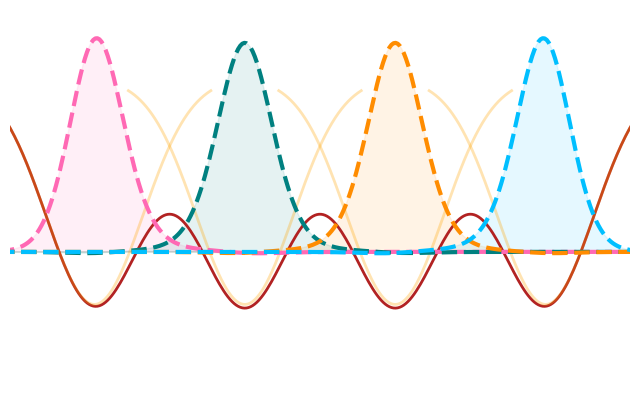

In [14]:
from matplotlib.figure import figaspect
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
edge = 0.6
wf_scale = 0.5
pwr = 1

y = np.array([0])
z = np.array([0])
taillen = 1.2

# Plot total potential
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
X = np.meshgrid(x, y, z, indexing="ij")
v = dvr.Vfun(*X) ** pwr
v = -abs(v[:, 0, 0])
plt.plot(x, v, "-", label="V", lw=2, color="firebrick")
vmin = np.min(v[:180])
vi_scale = -np.sqrt(abs(vmin))
vi_scale = -1
# plt.fill_between(x[v < vmin], vmin, v[v < vmin], color="firebrick", alpha=0.3)

# Plot single traps
for i in range(dvr.lattice.N):
    opacity = 0.3
    shift = dvr.trap_centers[i]
    dvr.update_waist(dvr.waists[i])
    x = np.linspace(shift[0] - taillen, shift[0] + taillen, 500)
    X = np.meshgrid(x, y, z, indexing="ij")
    vi = dvr.Voff[i] * DVR.Vfun(dvr, X[0] - shift[0], X[1] - shift[1], X[2]) ** pwr
    plt.plot(
        x,
        vi_scale * abs(vi[:, 0, 0]),
        "-",
        label="V",
        lw=2,
        color="orange",
        alpha=opacity,
    )

color = ["hotpink", "teal", "darkorange", "deepskyblue"]
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
wf = wf_scale * fix_phase(wannier_func([x, y, z], U, dvr, W, p)[:, 0, 0, :]) + E[0]
for i in range(dvr.lattice.N):
    shade_alpha = 0.1
    line_alpa = 1
    line_shape = "--"
    plt.plot(
        x,
        wf[:, i],
        line_shape,
        lw=3,
        color=color[i],
        label=f"$w_{i + 1}(x)$",
        alpha=line_alpa,
    )
    plt.fill_between(x, E[0], wf[:, i], color=color[i], alpha=shade_alpha)

plt.xlabel("dx")
plt.ylim(-1.4, .3)
plt.xlim(-dvr.R0[0] * edge, dvr.R0[0] * edge)
plt.axis("off")
plt.savefig("fig0d.svg", transparent=True, bbox_inches="tight")
